# WELCOME!

**Overview**

The data has been split into two groups:

- training set (train.csv)
- test set (test.csv)

**The training set** should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

**The test set** should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

**Data Dictionary**

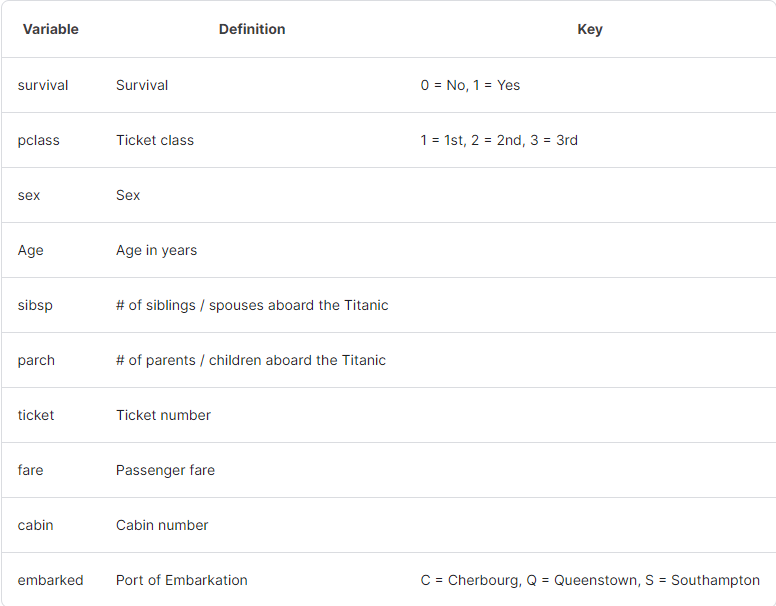

**Variable Notes**

pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

# Exploratory Data Analysis and Visualization

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (5,3.5)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [96]:
data = pd.read_csv('train.csv')
df = data.copy()

In [97]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [99]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [100]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [101]:
df.dropna(subset='Embarked',inplace=True)

In [102]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [103]:
df.duplicated().any()

False

In [104]:
df.sample(25)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
680,681,0,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.1375,NaN,Q
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
531,532,0,3,"Toufik, Mr. Nakli",male,NaN,0,0,2641,7.2292,NaN,C
202,203,0,3,"Johanson, Mr. Jakob Alfred",male,34.0,0,0,3101264,6.4958,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S
405,406,0,2,"Gale, Mr. Shadrach",male,34.0,1,0,28664,21.0000,NaN,S
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,2650,15.2458,NaN,C


In [105]:
df.Survived.value_counts()

0    549
1    340
Name: Survived, dtype: int64

### Pclass

In [106]:
df.groupby('Survived').Pclass.value_counts()

Survived  Pclass
0         3         372
          2          97
          1          80
1         1         134
          3         119
          2          87
Name: Pclass, dtype: int64

### Sex

In [107]:
df.groupby('Survived').Sex.value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    231
          male      109
Name: Sex, dtype: int64

Text(0.5, 0, 'Survived')

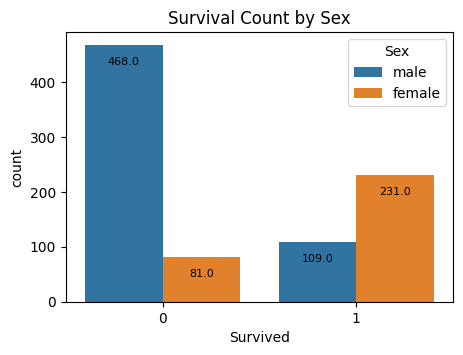

In [108]:
ax = sns.countplot(data=df, x='Survived', hue='Sex')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=8)

# set plot title and labels
plt.title('Survival Count by Sex')
plt.xlabel('Survived')

### SibSp

In [109]:
df.groupby('Survived').SibSp.value_counts()

Survived  SibSp
0         0        398
          1         97
          2         15
          4         15
          3         12
          8          7
          5          5
1         0        208
          1        112
          2         13
          3          4
          4          3
Name: SibSp, dtype: int64

### Parch

In [110]:
df.groupby('Survived').Parch.value_counts()

Survived  Parch
0         0        445
          1         53
          2         40
          4          4
          5          4
          3          2
          6          1
1         0        231
          1         65
          2         40
          3          3
          5          1
Name: Parch, dtype: int64

### Fare

In [111]:
df[df['Survived']==0].Fare.mean()

22.117886885245902

In [112]:
df[df['Survived']==1].Fare.mean() 

48.20949823529412

### Embarked

In [113]:
df.groupby('Survived').Embarked.value_counts()

Survived  Embarked
0         S           427
          C            75
          Q            47
1         S           217
          C            93
          Q            30
Name: Embarked, dtype: int64

In [114]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [115]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

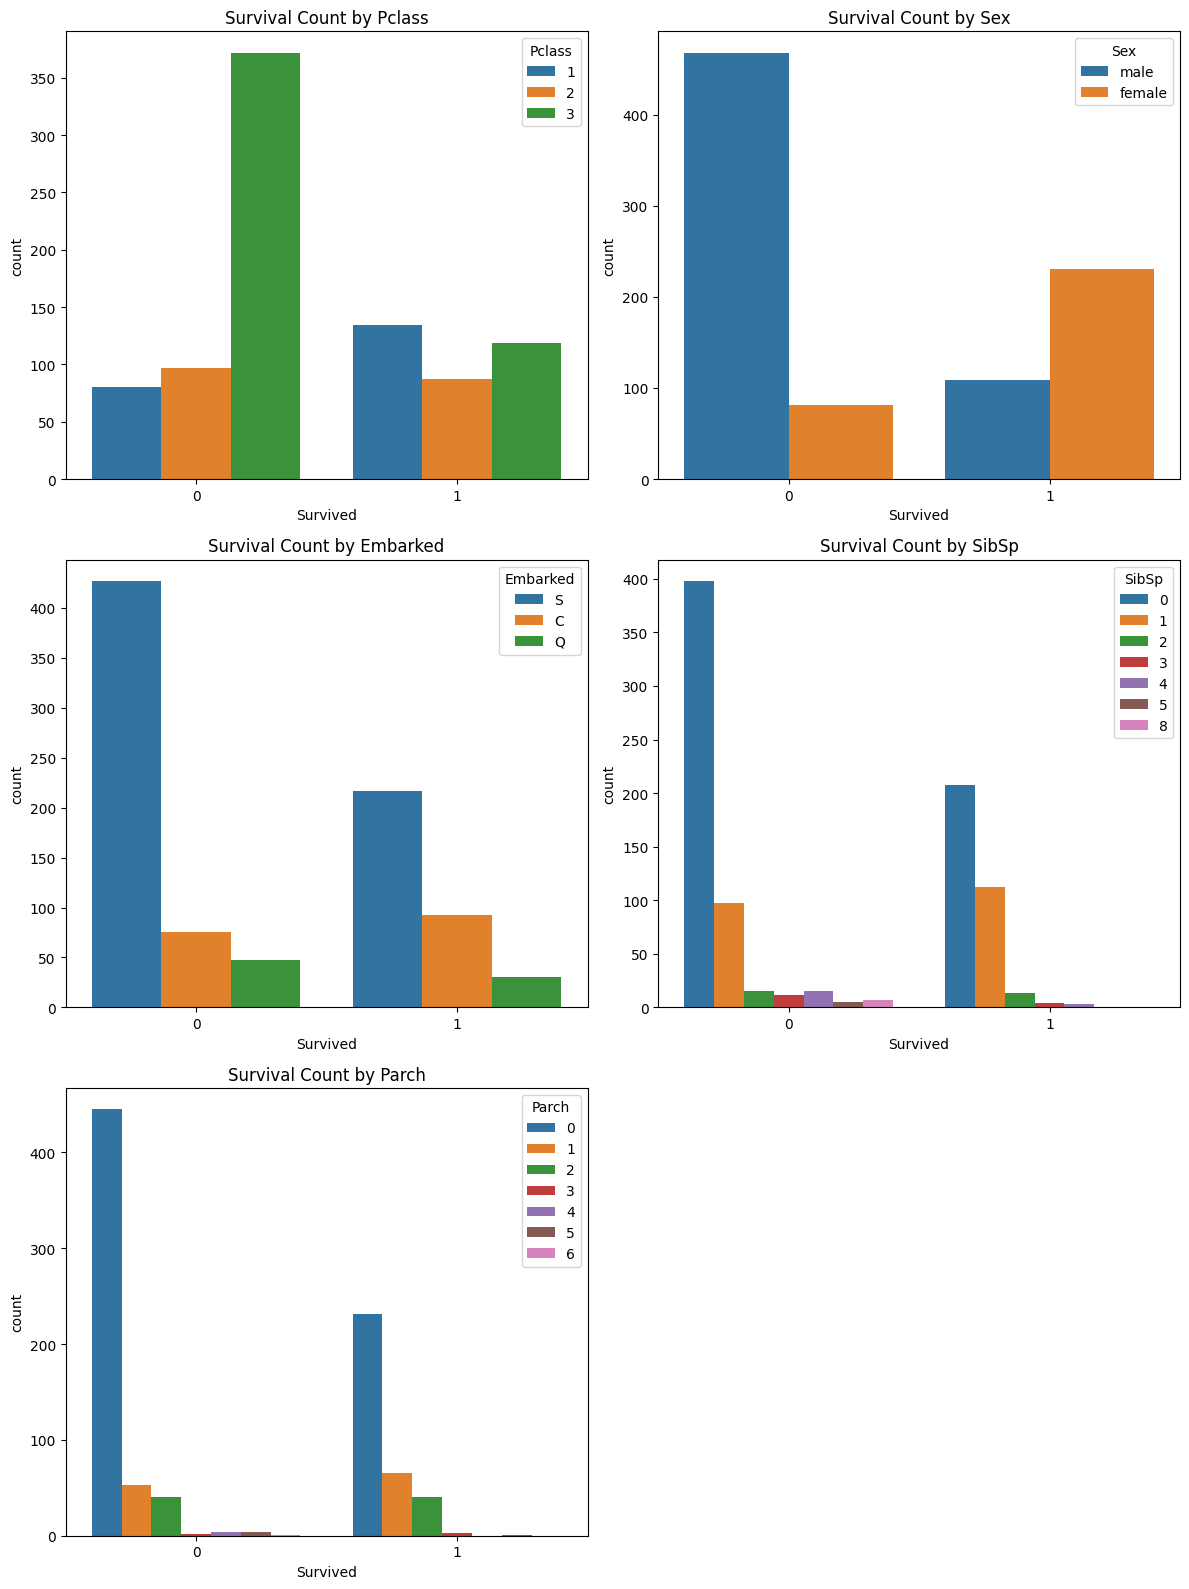

In [116]:
plt.figure(figsize=(12,16))

plt.subplot(321)
sns.countplot(data=df, x='Survived', hue='Pclass')
plt.title('Survival Count by Pclass')
plt.xlabel('Survived')

plt.subplot(322)
sns.countplot(data=df, x='Survived', hue='Sex')
plt.title('Survival Count by Sex')
plt.xlabel('Survived')

plt.subplot(323)
sns.countplot(data=df, x='Survived', hue='Embarked')
plt.title('Survival Count by Embarked')
plt.xlabel('Survived')

plt.subplot(324)
sns.countplot(data=df, x='Survived', hue='SibSp')
plt.title('Survival Count by SibSp')
plt.xlabel('Survived')

plt.subplot(325)
sns.countplot(data=df, x='Survived', hue='Parch')
plt.title('Survival Count by Parch')
plt.xlabel('Survived')

plt.tight_layout()
plt.show()

### Check for outliers

In [117]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0.5, 0, 'Survived')

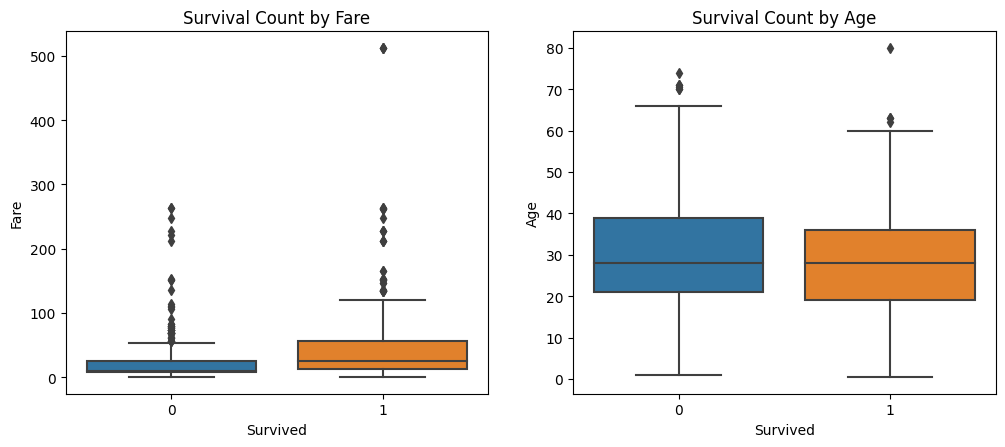

In [118]:
plt.figure(figsize=(12,16))

plt.subplot(321)
sns.boxplot(data=df, x='Survived', y='Fare')
plt.title('Survival Count by Fare')
plt.xlabel('Survived')

plt.subplot(322)
sns.boxplot(data=df, x='Survived', y='Age')
plt.title('Survival Count by Age')
plt.xlabel('Survived')



In [119]:
df['Fare'].describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [120]:
df[df['Fare'] >= 250].sort_values('Fare',ascending = False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


### Encoder


In [121]:
df.select_dtypes(include='object').columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [122]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Fit and transform the categorical columns to numerical labels
encoded_col_1 = le.fit_transform(df['Sex'])
encoded_col_2 = le.fit_transform(df['Embarked'])

# Replace the original categorical columns with the encoded columns
df['Sex_encoded'] = encoded_col_1
df['Embarked_encoded'] = encoded_col_2

In [123]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded,Embarked_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2


In [124]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_encoded,Embarked_encoded
PassengerId,1.000000,-0.005028,-0.035330,0.033681,-0.057686,-0.001657,0.012703,0.043136,0.013166
Survived,-0.005028,1.000000,-0.335549,-0.082446,-0.034040,0.083151,0.255290,-0.541585,-0.169718
Pclass,-0.035330,-0.335549,1.000000,-0.365902,0.081656,0.016824,-0.548193,0.127741,0.164681
Age,0.033681,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143,0.099037,-0.032565
SibSp,-0.057686,-0.034040,0.081656,-0.307351,1.000000,0.414542,0.160887,-0.116348,0.068900
Parch,-0.001657,0.083151,0.016824,-0.187896,0.414542,1.000000,0.217532,-0.247508,0.040449
Fare,0.012703,0.255290,-0.548193,0.093143,0.160887,0.217532,1.000000,-0.179958,-0.226311
Sex_encoded,0.043136,-0.541585,0.127741,0.099037,-0.116348,-0.247508,-0.179958,1.000000,0.110320
Embarked_encoded,0.013166,-0.169718,0.164681,-0.032565,0.068900,0.040449,-0.226311,0.110320,1.000000


<AxesSubplot: >

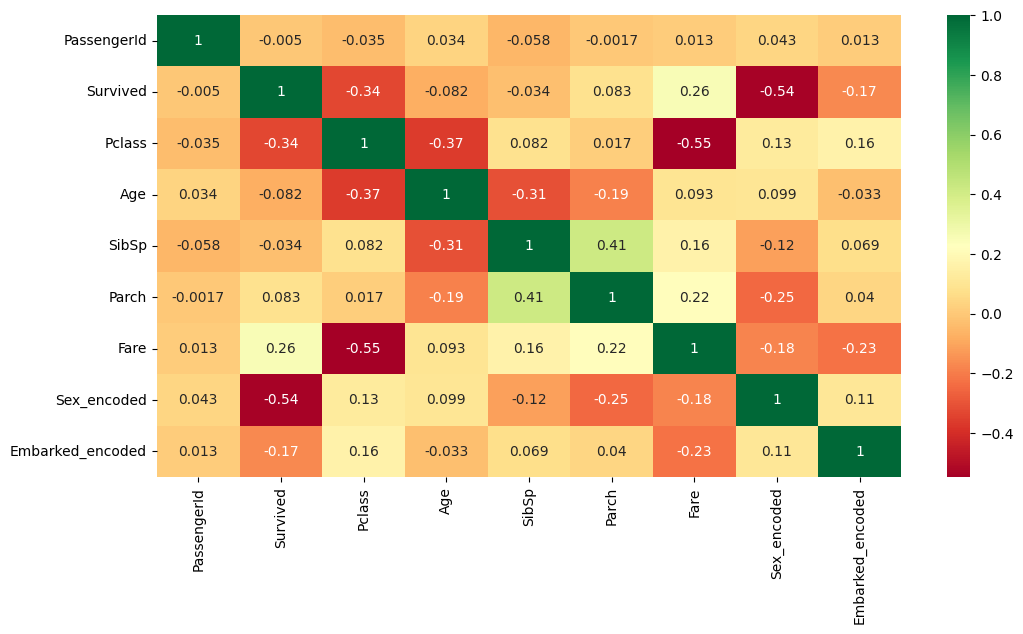

In [125]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(),annot=True,cmap = 'RdYlGn')

### Train Test Split

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_encoded',
       'Embarked_encoded'],
      dtype='object')

In [128]:
X = df[['Pclass','SibSp','Parch','Sex_encoded','Fare','Embarked_encoded']]
y = df['Survived']

In [129]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size= 0.20,random_state=42)

# AdaBoosting Classifier

In [130]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate

In [131]:
ada_model = AdaBoostClassifier(n_estimators=50,random_state=42)

In [132]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier(random_state=42)

In [133]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [134]:
eval_metric(ada_model,X_train,y_train,X_test,y_test)

Test_Set
[[85 24]
 [16 53]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       109
           1       0.69      0.77      0.73        69

    accuracy                           0.78       178
   macro avg       0.76      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178


Train_Set
[[382  58]
 [ 73 198]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       440
           1       0.77      0.73      0.75       271

    accuracy                           0.82       711
   macro avg       0.81      0.80      0.80       711
weighted avg       0.81      0.82      0.81       711



In [135]:
from sklearn.model_selection import cross_val_score, cross_validate

model = AdaBoostClassifier(n_estimators=50, random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.798846
test_precision    0.755705
test_recall       0.700926
test_f1           0.725064
dtype: float64

In [136]:
from sklearn.tree import plot_tree

In [137]:
model= AdaBoostClassifier(n_estimators=3 , random_state=42)
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=3, random_state=42)

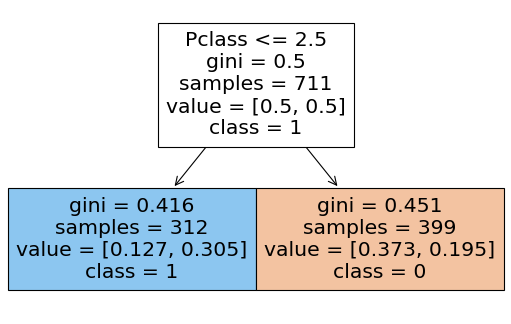

In [138]:
features = list(X.columns)
targets = df["Survived"].astype("str") #boostingde mutlaka yap 
plt.figure(figsize=(8,5),dpi=80)
plot_tree(model.estimators_[1], filled=True, feature_names=X.columns, class_names=targets.unique());#proportion=True (oran için)

### Analyzing performance

In [139]:
error_rates = []

for n in range(1,100):
    
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - f1_score(y_test,preds)
    
    error_rates.append(err)

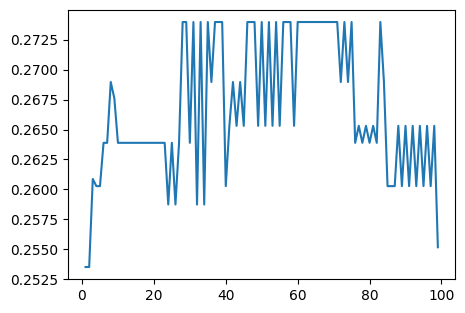

In [140]:
plt.plot(range(1,100), error_rates);

### Grid Search 

In [141]:
from sklearn.model_selection import GridSearchCV

In [142]:
model = AdaBoostClassifier(random_state=42)

In [143]:
param_grid = { 'n_estimators' : [10,20,30,45,65,70,80,90,100],'learning_rate':[0.01,0.1,0.2,0.5,1.0]}

In [144]:
ada_grid_model = GridSearchCV(model,param_grid,cv = 5,scoring='f1')

In [145]:
ada_grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.5, 1.0],
                         'n_estimators': [10, 20, 30, 45, 65, 70, 80, 90, 100]},
             scoring='f1')

In [146]:
ada_grid_model.best_params_

{'learning_rate': 0.5, 'n_estimators': 100}

In [147]:
ada_grid_model.best_score_

0.7245066333906356

In [148]:
y_pred = ada_grid_model.predict(X_test)

ada_f1 = f1_score(y_test, y_pred)
ada_recall = recall_score(y_test, y_pred)
ada_auc = roc_auc_score(y_test, y_pred)
eval_metric(ada_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[86 23]
 [16 53]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.82       109
           1       0.70      0.77      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.79      0.78      0.78       178


Train_Set
[[383  57]
 [ 74 197]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       440
           1       0.78      0.73      0.75       271

    accuracy                           0.82       711
   macro avg       0.81      0.80      0.80       711
weighted avg       0.81      0.82      0.81       711



### Feauture Importances

In [149]:
model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
model.feature_importances_

feats = pd.DataFrame(index=X.columns, data= model.feature_importances_, columns=['ada_importance'])
ada_imp_feats = feats.sort_values("ada_importance")
ada_imp_feats

,ada_importance
Embarked_encoded,0.05
Pclass,0.09
Parch,0.10
SibSp,0.18
Sex_encoded,0.28
Fare,0.30


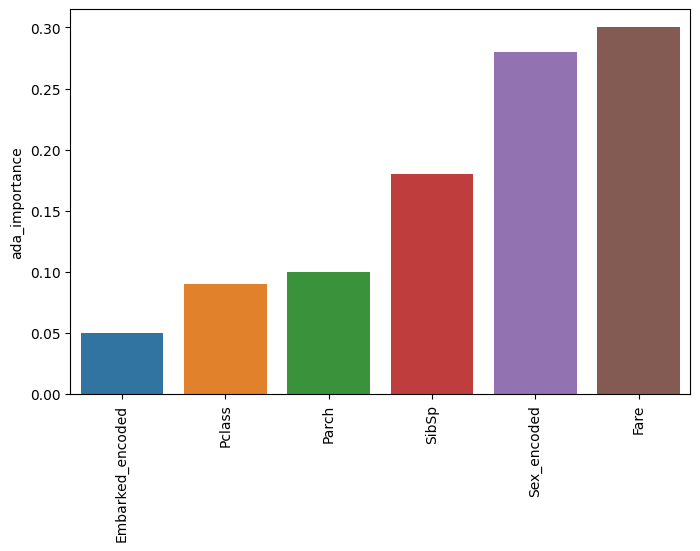

In [150]:
plt.figure(figsize=(8,5))
sns.barplot(data=ada_imp_feats ,x=ada_imp_feats.index, y='ada_importance')

plt.xticks(rotation=90);

In [151]:
from sklearn.metrics import precision_recall_curve,roc_curve, auc, roc_auc_score

Area under the Receiver Operating Characteristic (ROC) curve (AUC-ROC): This metric is a good choice when the cost of false positives and false negatives is roughly equal. AUC-ROC is the probability that a randomly selected positive sample will be ranked higher than a randomly selected negative sample.

Area under the Precision-Recall (PR) curve (AUC-PR): This metric is more appropriate when the cost of false positives and false negatives is not equal, and the focus is on the performance of the positive class. AUC-PR is the integral of precision as a function of recall.

F1-score: This metric is the harmonic mean of precision and recall, and is a good choice when there is an imbalance between the positive and negative classes. However, it gives equal weight to precision and recall, so it may not be appropriate when the cost of false positives and false negatives is not equal.

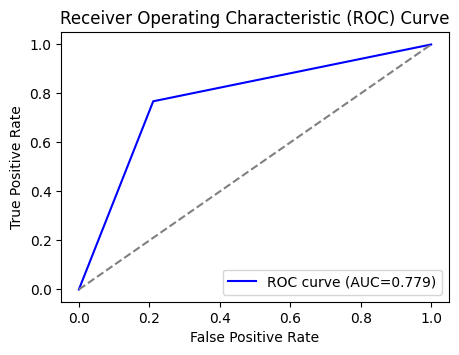

In [152]:
# Compute false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute area under the curve
auc_score = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC={auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



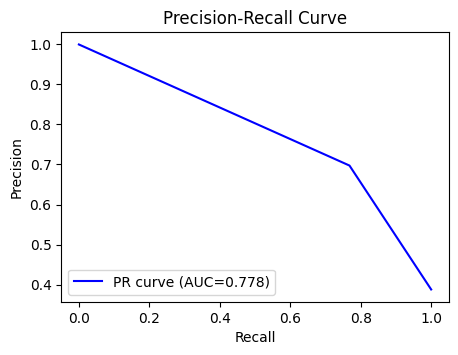

In [153]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Compute area under the curve
auc_score = auc(recall, precision)

# Plot precision-recall curve
plt.plot(recall, precision, color='blue', label=f'PR curve (AUC={auc_score:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# GradientBoosting Classifier

In [154]:
from sklearn.ensemble import GradientBoostingClassifier

In [155]:
X.head()

,Pclass,SibSp,Parch,Sex_encoded,Fare,Embarked_encoded
0,3,1,0,1,7.2500,2
1,1,1,0,0,71.2833,0
2,3,0,0,0,7.9250,2
3,1,1,0,0,53.1000,2
4,3,0,0,1,8.0500,2


In [156]:
grad_model = GradientBoostingClassifier(random_state=42)

In [157]:
grad_model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [158]:
eval_metric(grad_model,X_train,y_train,X_test,y_test)

Test_Set
[[92 17]
 [19 50]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       109
           1       0.75      0.72      0.74        69

    accuracy                           0.80       178
   macro avg       0.79      0.78      0.79       178
weighted avg       0.80      0.80      0.80       178


Train_Set
[[421  19]
 [ 61 210]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       440
           1       0.92      0.77      0.84       271

    accuracy                           0.89       711
   macro avg       0.90      0.87      0.88       711
weighted avg       0.89      0.89      0.89       711



In [159]:
model = GradientBoostingClassifier(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1', 'roc_auc'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.825626
test_precision    0.832989
test_recall       0.686640
test_f1           0.748073
test_roc_auc      0.867027
dtype: float64

### Grid Search

In [160]:
param_grid = { 'n_estimators':[100,200,300],
              'subsample':[0.5,1],'max_features' :[None,2,3,4,5]}

In [161]:
gb_model = GradientBoostingClassifier(random_state=42)

In [162]:
gb_grid_model = GridSearchCV(gb_model,param_grid,scoring='f1',verbose=2 , n_jobs=-1)

In [163]:
gb_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_features': [None, 2, 3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.5, 1]},
             scoring='f1', verbose=2)

In [164]:
gb_grid_model.best_params_

{'max_features': 4, 'n_estimators': 300, 'subsample': 0.5}

In [165]:
gb_grid_model.best_estimator_

GradientBoostingClassifier(max_features=4, n_estimators=300, random_state=42,
                           subsample=0.5)

In [166]:
gb_grid_model.best_score_

0.7530431670070553

In [167]:
y_pred = gb_grid_model.predict(X_test)

gb_f1 = f1_score(y_test, y_pred)
gb_recall = recall_score(y_test, y_pred)
gb_auc = roc_auc_score(y_test, y_pred)

eval_metric(gb_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[90 19]
 [18 51]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       109
           1       0.73      0.74      0.73        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178


Train_Set
[[421  19]
 [ 47 224]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       440
           1       0.92      0.83      0.87       271

    accuracy                           0.91       711
   macro avg       0.91      0.89      0.90       711
weighted avg       0.91      0.91      0.91       711



### Feature Importance

In [168]:
model = GradientBoostingClassifier(max_features= None, n_estimators = 300, subsample = 0.5, random_state=42)
model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['grad_importance'])
grad_imp_feats = feats.sort_values("grad_importance")
grad_imp_feats

,grad_importance
SibSp,0.039296
Embarked_encoded,0.051613
Parch,0.051862
Pclass,0.087293
Sex_encoded,0.226563
Fare,0.543373


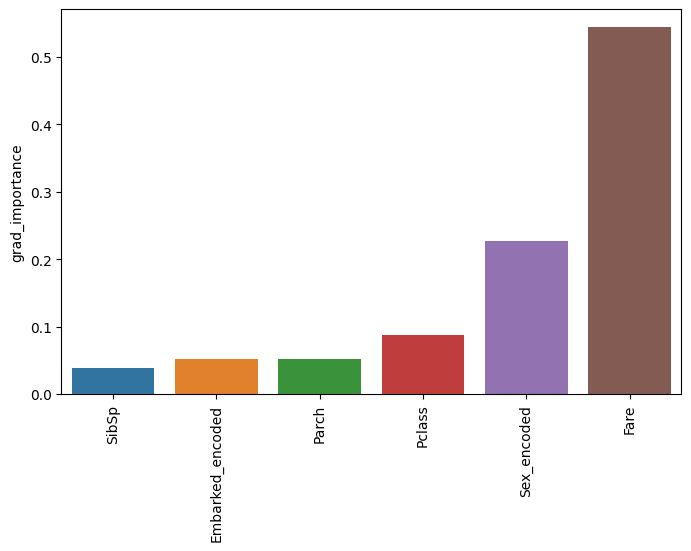

In [169]:
plt.figure(figsize=(8,5))
sns.barplot(data=grad_imp_feats, x=grad_imp_feats.index, y='grad_importance')

plt.xticks(rotation=90);

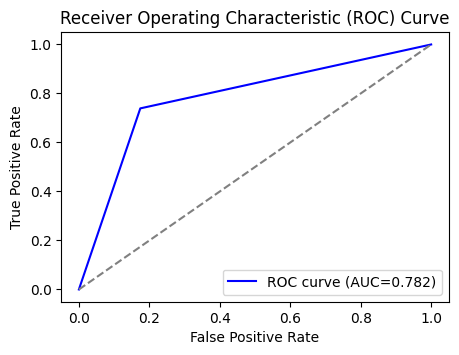

In [170]:
# Compute false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute area under the curve
auc_score = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC={auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


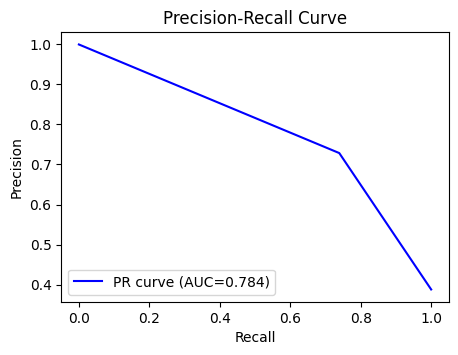

In [171]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Compute area under the curve
auc_score = auc(recall, precision)

# Plot precision-recall curve
plt.plot(recall, precision, color='blue', label=f'PR curve (AUC={auc_score:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# XGBoosting Classifier

In [172]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [173]:
from xgboost import XGBClassifier

In [174]:
xgb_model = XGBClassifier(random_state =42)

In [175]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [176]:
eval_metric(xgb_model,X_train,y_train,X_test,y_test)

Test_Set
[[87 22]
 [21 48]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       109
           1       0.69      0.70      0.69        69

    accuracy                           0.76       178
   macro avg       0.75      0.75      0.75       178
weighted avg       0.76      0.76      0.76       178


Train_Set
[[428  12]
 [ 45 226]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       440
           1       0.95      0.83      0.89       271

    accuracy                           0.92       711
   macro avg       0.93      0.90      0.91       711
weighted avg       0.92      0.92      0.92       711



In [177]:
model = XGBClassifier(random_state =42)

In [178]:
scores = cross_validate(model,X_train,y_train,scoring=['accuracy','precision','recall','f1','roc_auc'],cv = 10)

In [179]:
df_scores = pd.DataFrame(scores,index = range(1,11))
df_scores.mean()[2:]

test_accuracy     0.807316
test_precision    0.783619
test_recall       0.694048
test_f1           0.731628
test_roc_auc      0.842008
dtype: float64

### Grid Search 

n_estimators: The number of trees in the ensemble. Increasing this parameter will generally improve performance, but may lead to overfitting if the value is too high.

max_depth: The maximum depth of each tree. Deeper trees can capture more complex relationships in the data, but may overfit if the value is too high.

learning_rate: The step size at each iteration while searching for the optimal weights. Smaller values of learning rate can lead to better convergence, but require more iterations to converge.

subsample: The fraction of observations to be randomly sampled for each tree. This helps to prevent overfitting by making the algorithm more robust to noise.

colsample_bytree: The fraction of columns to be randomly sampled for each tree. This helps to prevent overfitting by making the algorithm more robust to noise and irrelevant features.

In [180]:
param_grid = {'n_estimators':[40,60,80],'max_depth':[3,4,5],'learning_rate':[0.2,0.25],
              'subsample':[0.45,0.5,0,55],'colsample_bytree':[0.4,0.5]}

In [181]:
xgb_model = XGBClassifier(random_state = 42)

In [182]:
xgb_grid_model = GridSearchCV(xgb_model,param_grid, scoring = 'f1', verbose = 2 , n_jobs = -1)

In [183]:
xgb_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5],
                         'learning_rate': [0.2, 0.25], 'max_depth': [3, 4, 5],
                         'n_estimators': [40, 60, 80],
                         'subsample': [0.45, 0.5, 0, 55]},
             scoring='f1', verbose=2)

In [184]:
xgb_grid_model.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.25,
 'max_depth': 5,
 'n_estimators': 80,
 'subsample': 0.5}

In [185]:
xgb_grid_model.best_score_

0.7436062205862877

In [186]:
y_pred = xgb_grid_model.predict(X_test)

In [187]:
xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)

eval_metric(xgb_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[89 20]
 [18 51]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       109
           1       0.72      0.74      0.73        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178


Train_Set
[[406  34]
 [ 54 217]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       440
           1       0.86      0.80      0.83       271

    accuracy                           0.88       711
   macro avg       0.87      0.86      0.87       711
weighted avg       0.88      0.88      0.88       711



### Feature Importance

In [188]:
model = XGBClassifier(random_state=42, n_estimators = 60,colsample_bytree = 0.4, subsample= 0.5,learning_rate = 0.2,max_depth= 5)
model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['xgb_importance'])
xgb_imp_feats = feats.sort_values("xgb_importance")
xgb_imp_feats

,xgb_importance
Embarked_encoded,0.046685
SibSp,0.050379
Parch,0.059004
Fare,0.084993
Pclass,0.087989
Sex_encoded,0.670949


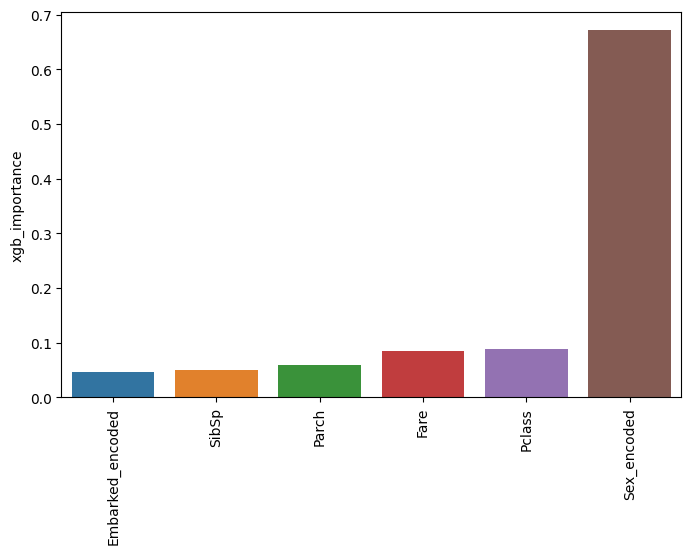

In [189]:
plt.figure(figsize=(8,5))
sns.barplot(data=xgb_imp_feats, x=xgb_imp_feats.index,y='xgb_importance')

plt.xticks(rotation=90);

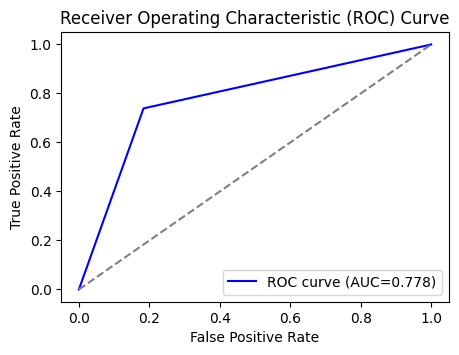

In [190]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute area under the curve
auc_score = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC={auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

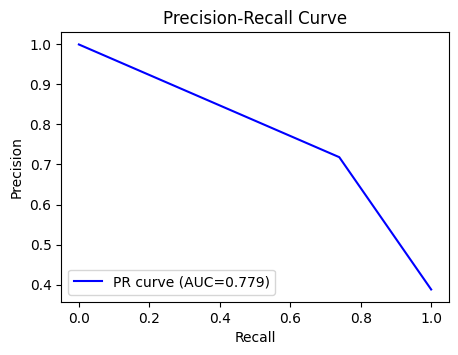

In [191]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Compute area under the curve
auc_score = auc(recall, precision)

# Plot precision-recall curve
plt.plot(recall, precision, color='blue', label=f'PR curve (AUC={auc_score:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

### Comparing Models

In [192]:
pd.concat([ada_imp_feats, grad_imp_feats, xgb_imp_feats], axis=1)

,ada_importance,grad_importance,xgb_importance
Embarked_encoded,0.05,0.051613,0.046685
Pclass,0.09,0.087293,0.087989
Parch,0.10,0.051862,0.059004
SibSp,0.18,0.039296,0.050379
Sex_encoded,0.28,0.226563,0.670949
Fare,0.30,0.543373,0.084993


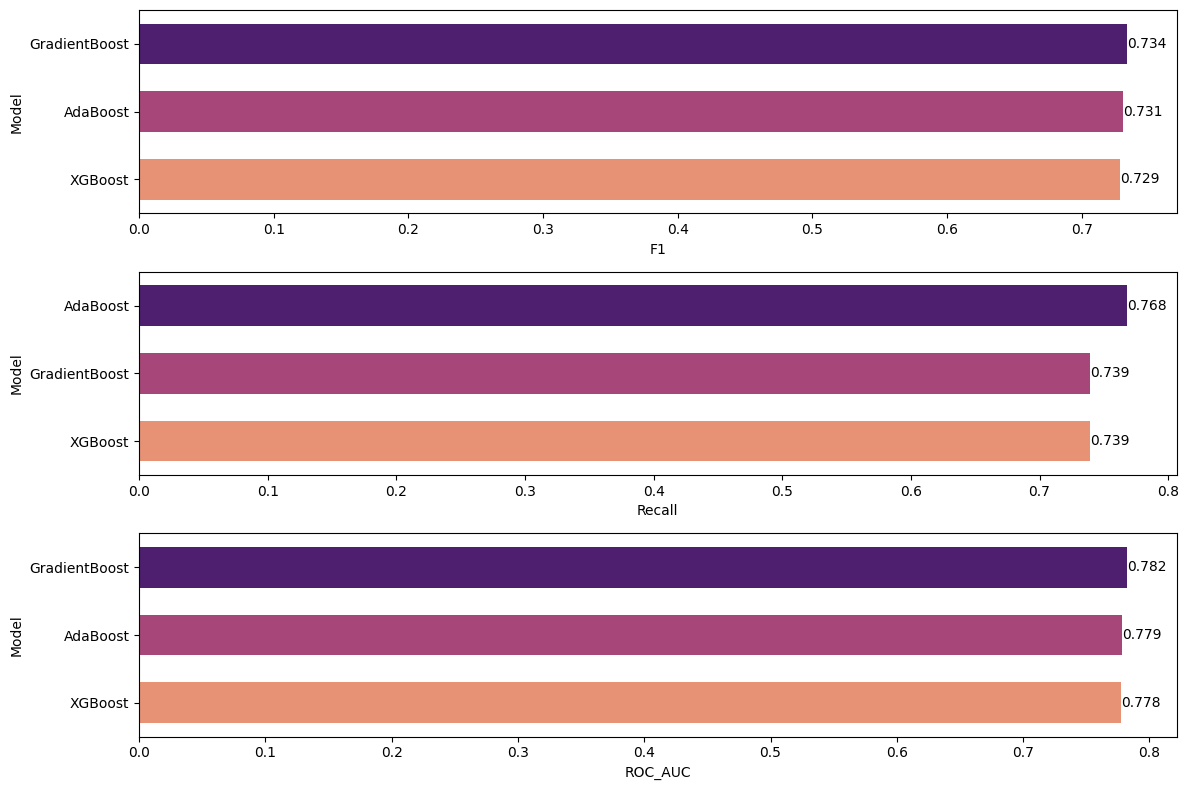

In [193]:
compare = pd.DataFrame({"Model": ["AdaBoost","GradientBoost", "XGBoost"],
                        "F1": [ada_f1, gb_f1, xgb_f1],
                        "Recall": [ada_recall, gb_recall, xgb_recall],
                        "ROC_AUC": [ada_auc, gb_auc, xgb_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(12,8))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="magma",width=0.6)
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="magma",width=0.6)
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="magma",width=0.6)
labels(ax)
plt.tight_layout()
plt.show()

### Conclusion

##### Scores say that we should choose the Ada Boost model, but before taking a decision let see how the scores will change if we use only 2 features.

In [194]:
X2 = df[['Pclass','Sex_encoded']]
y2 = df['Survived']

In [195]:
X_train,X_test,y_train,y_test = train_test_split(X2, y2, test_size= 0.20,random_state=42)

In [196]:
model_new = AdaBoostClassifier(random_state=42)

In [197]:
param_grid = { 'n_estimators' : [10,20,30,45,65,70,80,90,100],'learning_rate':[0.01,0.1,0.2,0.5,1.0]}

In [198]:
ada_grid_model2 = GridSearchCV(model_new,param_grid,cv = 5,scoring='f1')

In [199]:
ada_grid_model2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.5, 1.0],
                         'n_estimators': [10, 20, 30, 45, 65, 70, 80, 90, 100]},
             scoring='f1')

In [200]:
ada_grid_model2.best_params_

{'learning_rate': 0.01, 'n_estimators': 10}

In [201]:
y_pred = ada_grid_model2.predict(X_test)

ada_f1_2 = f1_score(y_test, y_pred)
ada_recall_2 = recall_score(y_test, y_pred)
ada_auc_2 = roc_auc_score(y_test, y_pred)
eval_metric(ada_grid_model2, X_train, y_train, X_test, y_test)

print('*' * 50)
print('{:<20}{}'.format('f1:', ada_f1_2))
print('*' * 50)
print('{:<20}{}'.format('Recall:', ada_recall_2))
print('*' * 50)
print('{:<20}{}'.format('Roc_Auc:', ada_auc_2))
print('*' * 50)

Test_Set
[[89 20]
 [16 53]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       109
           1       0.73      0.77      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178


Train_Set
[[379  61]
 [ 93 178]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       440
           1       0.74      0.66      0.70       271

    accuracy                           0.78       711
   macro avg       0.77      0.76      0.76       711
weighted avg       0.78      0.78      0.78       711

**************************************************
f1:                 0.7464788732394365
**************************************************
Recall:             0.7681159420289855
**************************************************
Roc_Auc:            0.7923148517484376
**************

### Final Conclusion

##### With 2 features our Ada Boost model gets higher scores. 

In [202]:
X2 = df[['Pclass','Sex_encoded']]
y2 = df['Survived']

In [203]:
model_final = AdaBoostClassifier(n_estimators= 10,learning_rate=0.01)

In [204]:
model_final.fit(X2,y2)

AdaBoostClassifier(learning_rate=0.01, n_estimators=10)

In [205]:
test= pd.read_csv('test.csv')

In [206]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [207]:
le = LabelEncoder()

# Fit and transform the categorical columns to numerical labels
encoded_col_1 = le.fit_transform(test['Sex'])


# Replace the original categorical columns with the encoded columns
test['Sex_encoded'] = encoded_col_1

In [208]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [209]:
X_test_new = test[['Pclass','Sex_encoded']]

In [210]:
final_predict=model_final.predict(X_test_new)
final_predict

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [211]:
gender_submission = pd.read_csv('gender_submission.csv')

In [212]:
gender_submission['predict'] = final_predict

In [213]:
gender_submission

,PassengerId,Survived,predict
0,892,0,0
1,893,1,1
2,894,0,0
3,895,0,0
4,896,1,1
...,...,...,...
413,1305,0,0
414,1306,1,1
415,1307,0,0
416,1308,0,0


In [214]:
gender_submission[gender_submission['Survived'] != gender_submission['predict']].count()

PassengerId    0
Survived       0
predict        0
dtype: int64

##### THE END


In [215]:
accuracy_score(gender_submission.Survived.values,final_predict)

1.0